# Naive Bayes

## Importing the libraries

In [1]:
%load_ext autotime

time: 0 ns


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import codecs
import re

time: 2.3 s


## Importing the dataset

In [3]:
dataset = pd.read_csv(r'datasets_483_982_spam.csv', encoding = 'latin-1')
all_data = []

for content,label in dataset[['v2','v1']].values:
    if label == 'spam':
        label = 1
    else :
        label = 0
    all_data.append([content, label])
all_data = np.array(all_data)

time: 78 ms


In [8]:
all_data[0]

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       '0'], dtype='<U910')

time: 0 ns


### 取出訓練內文與標註

In [9]:
X = all_data[:,0]
Y = all_data[:,1].astype(np.uint8)

time: 16 ms


In [10]:
print('Training Data Examples : \n{}'.format(X[:5]))

Training Data Examples : 
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"]
time: 0 ns


In [11]:
print('Labeling Data Examples : \n{}'.format(Y[:5]))

Labeling Data Examples : 
[0 0 1 0 0]
time: 0 ns


### 文字預處理

In [12]:
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords

import nltk

nltk.download('stopwords')

# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

## 創建Lemmatizer
lemmatizer = WordNetLemmatizer() 
def get_wordnet_pos(word):
    """將pos_tag結果mapping到lemmatizer中pos的格式"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def clean_content(X):
    # remove non-alphabet characters
    X_clean = [re.sub('[^a-zA-Z]',' ', x).lower() for x in X]
    # tokenize
    X_word_tokenize = [nltk.word_tokenize(x) for x in X_clean]
    # stopwords_lemmatizer
    X_stopwords_lemmatizer = []
    stop_words = set(stopwords.words('english'))
    for content in X_word_tokenize:
        content_clean = []
        for word in content:
            if word not in stop_words:
                word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
                content_clean.append(word)
        X_stopwords_lemmatizer.append(content_clean)
    
    X_output = [' '.join(x) for x in X_stopwords_lemmatizer]
    
    return X_output
                 

time: 4.31 s


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perry.wei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
X = clean_content(X)

time: 41.5 s


## Bag of words

In [16]:
from collections import Counter

time: 0 ns


In [25]:
tmp_s = ''
for i in X:
    tmp_s = tmp_s + i

tmp_a = Counter(tmp_s.split(), )

time: 0 ns


In [40]:
df_tmp = pd.DataFrame(tmp_a.items(), columns=['word','cnt'])
df_tmp.sort_values(by=['cnt'], ascending=False, inplace=True)

time: 31 ms


In [62]:
a = tmp_a.values()
sum(list(a))

44472

time: 0 ns


In [65]:
n = 0
cnt_word = 0
for i in tmp_a:
    n += tmp_a[i]
    cnt_word += 1
    if n >= 44472*0.8:
        print(f'取{cnt_word}個字可解釋80%的出現頻率')
        break


取4005個字可解釋80%的出現頻率
time: 0 ns


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
#max_features是要建造幾個column，會按造字出現的高低去篩選 
countvector = CountVectorizer(max_features=4005)
X = countvector.fit_transform(X)


time: 94 ms


In [68]:
X.shape

(5572, 4005)

time: 0 ns


## Splitting the dataset into the Training set and Test set

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

time: 16 ms


## Fit the MultinomialNB model on the Training set

In [73]:
from sklearn.naive_bayes import MultinomialNB
clf_M = MultinomialNB()
clf_M = mnb.fit(X_train, y_train)
clf_M

MultinomialNB()

time: 0 ns


## Predicting a new result (可與前章節KNN模型比較)

In [74]:
print('Trainset Accuracy: {}'.format(clf_M.score(X_train, y_train)))

Trainset Accuracy: 0.9896791563832175
time: 0 ns


In [75]:
print('Testset Accuracy: {}'.format(clf_M.score(X_test, y_test)))

Testset Accuracy: 0.9820627802690582
time: 0 ns


## Predicting the Test set results

In [76]:
y_pred = clf_M.predict(X_test)

time: 0 ns


## Making the Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[938  11]
 [  9 157]]


0.9820627802690582

time: 16 ms


In [78]:
def plot_cm_output(cm, labels=['ham', 'spam']):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap=plt.cm.Blues,)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

time: 0 ns


<ipython-input-78-8e4c3b8eb4f9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-78-8e4c3b8eb4f9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


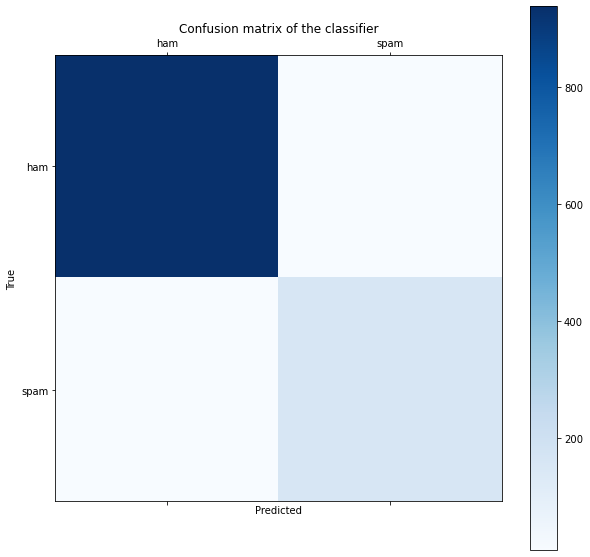

time: 281 ms


In [79]:
plot_cm_output(cm)